In [347]:
import pandas as pd # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for simple plots
from sklearn.preprocessing import StandardScaler
import phik
from phik.report import plot_correlation_matrix
from phik import report
import seaborn as sns # for slightly more complicated plots
import numpy as np # for numerical computing and linear algebra data structur
from numba import jit # for JIT compilation facilties for improved efficiency

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
import sklearn.linear_model as linear
import sklearn.metrics as metrics

#### Data Ingestion

DATA DESCRIPTION:<br>
Input features:<br>
Objective: factual information;<br>
Examination: results of medical examination;<br>
Subjective: information given by the patient.<br>

Features:<br>
Age | Objective Feature | age | int (days)<br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary | 1-Yes, 0-No<br>
Alcohol intake | Subjective Feature | alco | binary | 1-Yes, 0-No<br>
Physical activity | Subjective Feature | active | binary | 1-Yes, 0-No<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 1-Yes, 0-No” <br>


In [348]:
#Reading in the data and storing it into a pandas dataframe
df = pd.read_csv('cardio_train 3.csv',sep=';') 

#### Data Pre-Processing

In [349]:
#display first 20 rows
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


#### Checking for duplicate ids in the dataset

In [350]:
df['id'].value_counts() 
#no duplicates found hence keep all rows

0        1
66623    1
66631    1
66630    1
66628    1
        ..
33338    1
33339    1
33340    1
33341    1
99999    1
Name: id, Length: 70000, dtype: int64

Converting age from number of days to year

In [351]:
df['age'] = (df['age'] / 365.25).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


#### Data Observation

In [352]:
df.info()
#The data is in an appropriate format and contains all its values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### Data imputation to preserve statistical power, avoid bias as much as possible.

In [353]:
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({
                                     'percent_missing': percent_missing})
    return missing_value_df

produce_missing_report(df) #Confirmed no data missing from the rows

,percent_missing
id,0.0
age,0.0
gender,0.0
height,0.0
weight,0.0
ap_hi,0.0
ap_lo,0.0
cholesterol,0.0
gluc,0.0
smoke,0.0


#### Data Standardization to ensure that all features have a similar scale and variance.

In [354]:
def standardize_col(col):
    scaler = StandardScaler()
    std_col = scaler.fit_transform(col.values.reshape(-1, 1))
    return std_col

standardize_col(df['age'])
standardize_col(df['height'])
standardize_col(df['weight'])
standardize_col(df['ap_hi'])
standardize_col(df['ap_lo'])
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


#### Outlier Detection analysis on the age, height, weight, ap_hi, and ap_lo columns, since they are continuous numerical variables that may have outliers.

Performing outlier detection on the age column

In [355]:
df['age'].describe()

count    70000.000000
mean        52.803257
std          6.762462
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

In [356]:
Q1 = df['age'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['age'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  48.0
Q3  58.0
IQR 10.0


In [357]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  73.0
lower  33.0


In [358]:
df_without_outliers = df[(df['age'] < upper_bound) & (df['age'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x28a277df0>,
 'caps': [<matplotlib.lines.Line2D at 0x28a254370>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a277bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x28a254790>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a254a30>],
 'means': []}

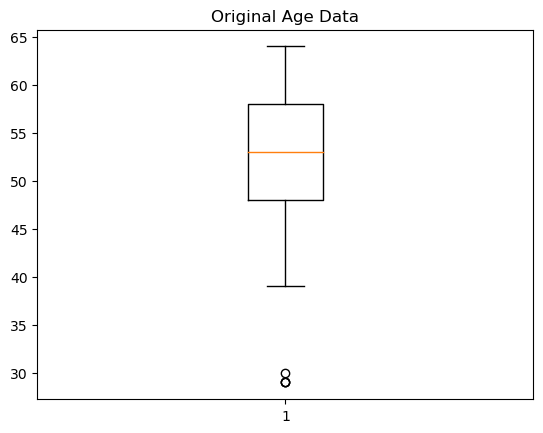

In [359]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Age Data')
ax1.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28a3fd690>,
 'caps': [<matplotlib.lines.Line2D at 0x28a3fdbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a3fd3f0>],
 'medians': [<matplotlib.lines.Line2D at 0x28a3fe110>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a3fe3b0>],
 'means': []}

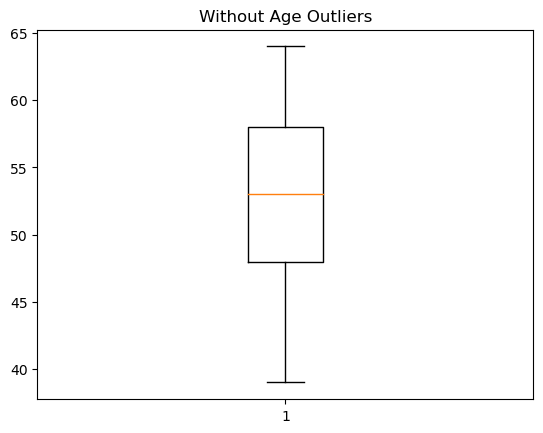

In [360]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Age Outliers')
ax1.boxplot(df_without_outliers['age'])

In [361]:
df_without_outliers = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69992,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69993,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69994,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the height column

In [362]:
df['height'].describe() # uncertain of if this is needed, people have varied height doesnt mean it contributes to CVD. however the column continuous. do correlation matrix to see the relevance

count    69996.000000
mean       164.359063
std          8.210122
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [363]:
Q1 = df['height'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['height'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  159.0
Q3  170.0
IQR 11.0


In [364]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  186.5
lower  142.5


In [365]:
df_without_outliers = df[(df['height'] < upper_bound) & (df['height'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69992,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69993,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69994,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x28a3bf2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x28a3bf6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a3bf010>],
 'medians': [<matplotlib.lines.Line2D at 0x28a3bfc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a3bfeb0>],
 'means': []}

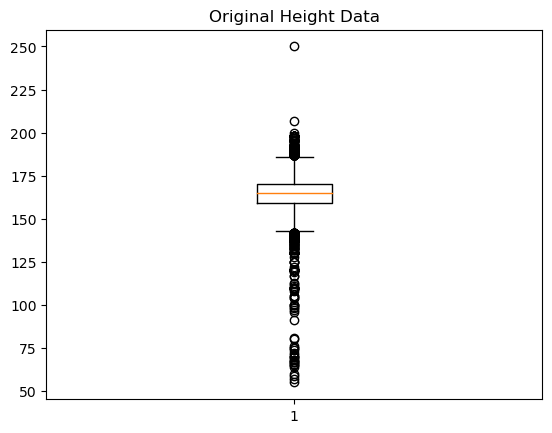

In [366]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Height Data')
ax1.boxplot(df['height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28a335c00>,
 'caps': [<matplotlib.lines.Line2D at 0x28a336140>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a335960>],
 'medians': [<matplotlib.lines.Line2D at 0x28a336560>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a336800>],
 'means': []}

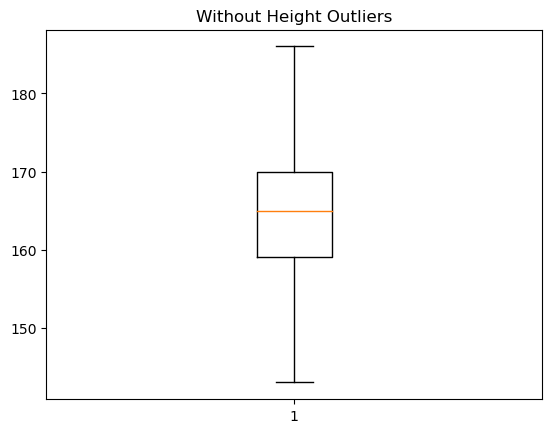

In [367]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Height Outliers')
ax1.boxplot(df_without_outliers['height'])

In [368]:
df_without_outliers = df[(df['height'] > lower_bound) & (df['height'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69472,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69473,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69474,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69475,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the weight column

In [369]:
df['weight'].describe()

count    69477.000000
mean        74.152953
std         14.287850
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [370]:
Q1 = df['weight'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['weight'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  65.0
Q3  82.0
IQR 17.0


In [371]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  107.5
lower  39.5


In [372]:
df_without_outliers = df[(df['weight'] < upper_bound) & (df['weight'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69471,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
69472,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69474,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69475,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x28a41ee60>,
 'caps': [<matplotlib.lines.Line2D at 0x28a41f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a41ebc0>],
 'medians': [<matplotlib.lines.Line2D at 0x28a41f7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a41fa60>],
 'means': []}

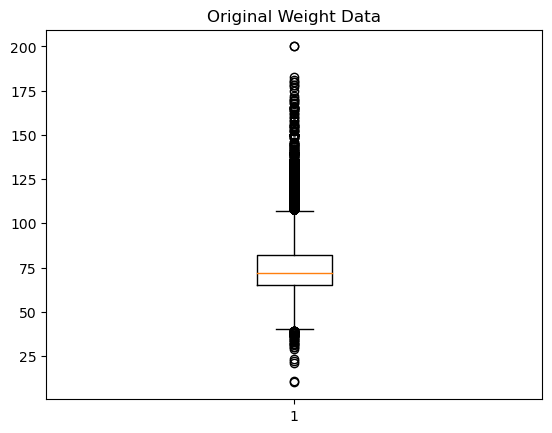

In [373]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Weight Data')
ax1.boxplot(df['weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28a4a4f40>,
 'caps': [<matplotlib.lines.Line2D at 0x28a4a5480>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a4a4ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x28a4a59c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a4a5c60>],
 'means': []}

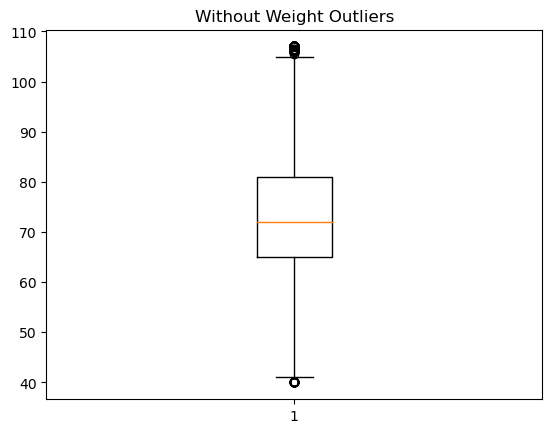

In [374]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Weight Outliers')
ax1.boxplot(df_without_outliers['weight'])

In [375]:
df_without_outliers = df[(df['weight'] > lower_bound) & (df['weight'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67714,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
67715,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
67716,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
67717,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the ap_hi column

In [376]:
df['ap_hi'].describe()

count    67719.000000
mean       128.585951
std        156.528328
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [377]:
Q1 = df['ap_hi'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['ap_hi'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  120.0
Q3  140.0
IQR 20.0


In [378]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  170.0
lower  90.0


In [379]:
df_without_outliers = df[(df['ap_hi'] < upper_bound) & (df['ap_hi'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67713,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
67714,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
67715,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
67717,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x28a4f38e0>,
 'caps': [<matplotlib.lines.Line2D at 0x28a4f3e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a4f2830>],
 'medians': [<matplotlib.lines.Line2D at 0x28a5203a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a520640>],
 'means': []}

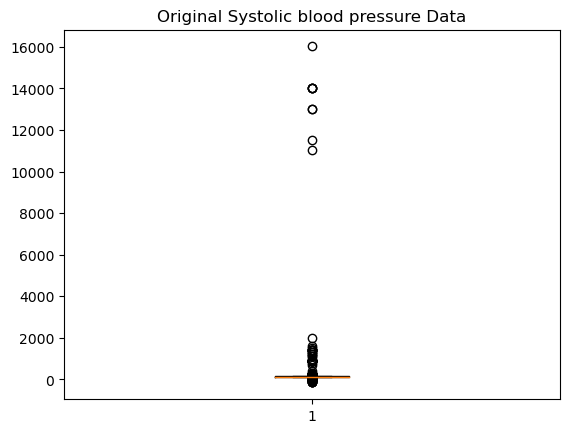

In [380]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Systolic blood pressure Data')
ax1.boxplot(df['ap_hi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28a572500>,
 'caps': [<matplotlib.lines.Line2D at 0x28a572a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a572260>],
 'medians': [<matplotlib.lines.Line2D at 0x28a572f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a573220>],
 'means': []}

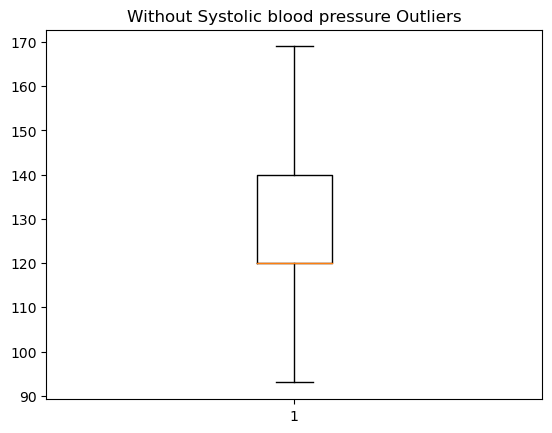

In [381]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Systolic blood pressure Outliers')
ax1.boxplot(df_without_outliers['ap_hi'])

In [382]:
df_without_outliers = df[(df['ap_hi'] > lower_bound) & (df['ap_hi'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64798,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
64799,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
64800,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
64801,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


Performing outlier detection on the ap_lo column

In [383]:
df['ap_lo'].describe()

count    64803.000000
mean        93.685107
std        181.503375
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      10000.000000
Name: ap_lo, dtype: float64

In [384]:
Q1 = df['ap_lo'].quantile(0.25)
print("Q1 ", Q1)
Q3 = df['ap_lo'].quantile(0.75)
print("Q3 ", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

Q1  80.0
Q3  90.0
IQR 10.0


In [385]:
upper_bound = Q3 + 1.5 * IQR
print("upper ", upper_bound)
lower_bound = Q1 - 1.5 * IQR
print("lower ", lower_bound)

upper  105.0
lower  65.0


In [386]:
df_without_outliers = df[(df['ap_lo'] < upper_bound) & (df['ap_lo'] > lower_bound)]
df_without_outliers

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,8,59,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64798,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
64799,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
64800,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
64801,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x28a5f1930>,
 'caps': [<matplotlib.lines.Line2D at 0x28a5f1e70>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a5f1690>],
 'medians': [<matplotlib.lines.Line2D at 0x28a5f23b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a5f2650>],
 'means': []}

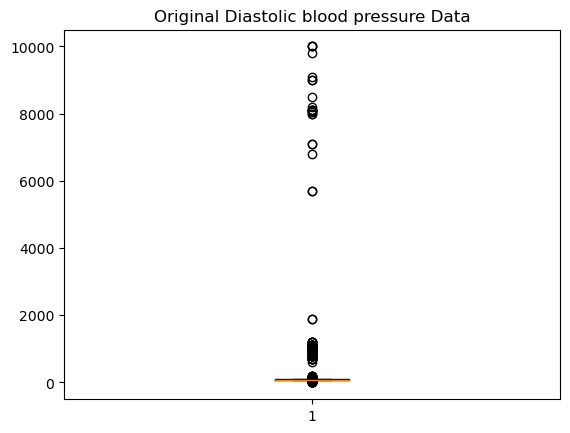

In [387]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Diastolic blood pressure Data')
ax1.boxplot(df['ap_lo'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28a64ae60>,
 'caps': [<matplotlib.lines.Line2D at 0x28a64b280>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a64abc0>],
 'medians': [<matplotlib.lines.Line2D at 0x28a64b7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a64ba60>],
 'means': []}

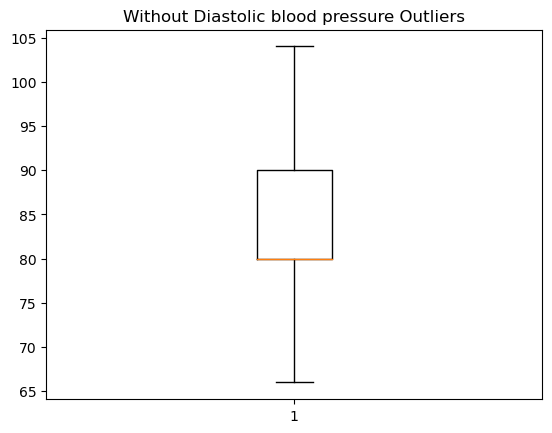

In [388]:
fig1, ax1 = plt.subplots()
ax1.set_title('Without Diastolic blood pressure Outliers')
ax1.boxplot(df_without_outliers['ap_lo'])

In [389]:
df_without_outliers = df[(df['ap_lo'] > lower_bound) & (df['ap_lo'] < upper_bound)].reset_index(drop=True)
df = df_without_outliers
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,8,59,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61766,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
61767,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
61768,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
61769,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


## EDA

Non-Modifiable Cause:

Old Age
Heridity
Gender Factor such as Male

Modifiable Cause: 
Alcohol
Smoking
Physical activity


## Univariate and Bivariate analysis 


In [390]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [391]:
# to understand variables look at their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61771 entries, 0 to 61770
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           61771 non-null  int64  
 1   age          61771 non-null  int64  
 2   gender       61771 non-null  int64  
 3   height       61771 non-null  int64  
 4   weight       61771 non-null  float64
 5   ap_hi        61771 non-null  int64  
 6   ap_lo        61771 non-null  int64  
 7   cholesterol  61771 non-null  int64  
 8   gluc         61771 non-null  int64  
 9   smoke        61771 non-null  int64  
 10  alco         61771 non-null  int64  
 11  active       61771 non-null  int64  
 12  cardio       61771 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.1 MB


#### Investigating if age has an influence on the target variable 

<AxesSubplot: xlabel='age', ylabel='count'>

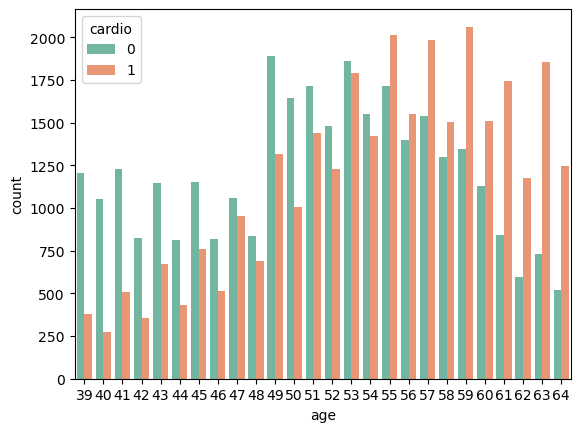

In [392]:
sns.countplot(x='age', hue='cardio', data = df, palette="Set2")
#This plot has shown that CVD is more prevalent in patients who 55 years old and  older hence age influences the target variable- presence or absence of CVD

#### Descriptive statistics

In [393]:
df.describe()
#displays statistics such as min, max, mean, std

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000,61771.000000
mean,49958.487041,52.863123,1.348853,164.421622,73.159013,126.182189,81.651163,1.355863,1.220103,0.086432,0.052015,0.804309,0.491865
std,28868.135268,6.734729,0.476611,7.526360,12.247023,13.692640,7.566325,0.674082,0.567387,0.281003,0.222058,0.396735,0.499938
min,0.000000,39.000000,1.000000,143.000000,40.000000,95.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24888.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50013.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74893.500000,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,186.000000,107.000000,169.000000,104.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Investigation the gender distribution in the dataset

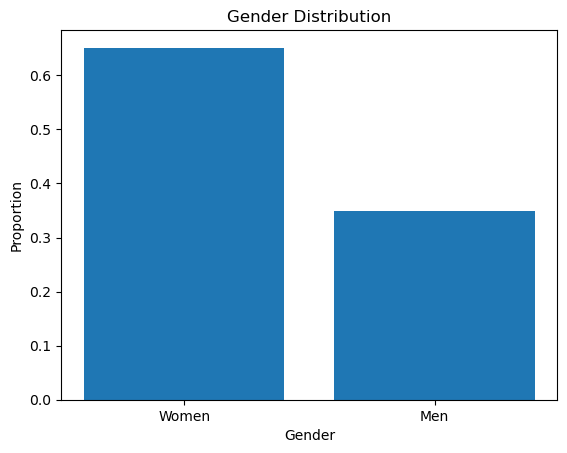

In [394]:
gender_map = {1: 'Women', 2: 'Men'}
gender_counts = df['gender'].map(gender_map).value_counts(normalize=True)
plt.bar(gender_counts.index, gender_counts)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()
# there are more female test subjects in the dataset than male

#### Investigating if gender has an influence on the target variable 

<AxesSubplot: xlabel='gender', ylabel='count'>

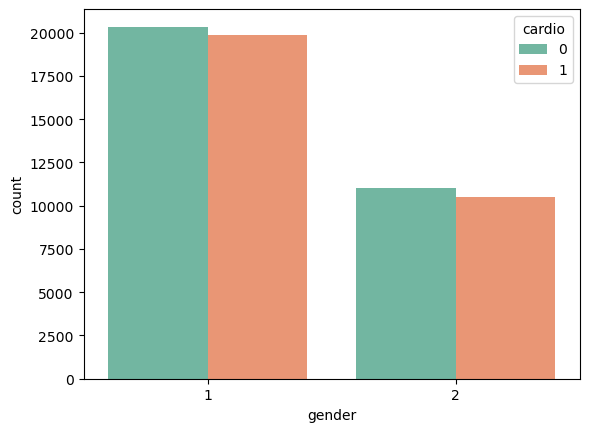

In [395]:
sns.countplot(x='gender', hue='cardio', data = df, palette="Set2")
#gender does not affect the target variable

<AxesSubplot: xlabel='variable', ylabel='count'>

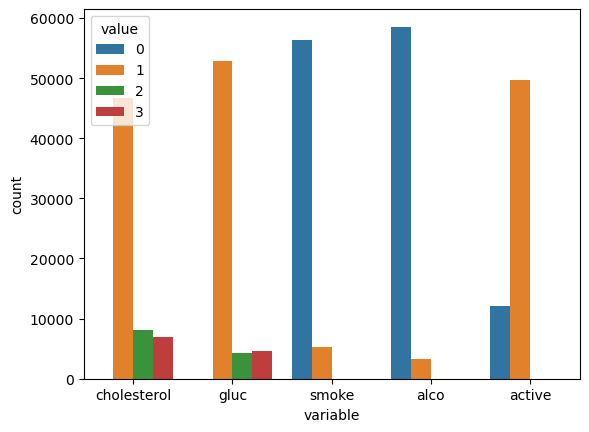

In [396]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical))
# this shows the socioeconomic factors that affect patients (some attributes that may lead to cvd)

<AxesSubplot: ylabel='Frequency'>

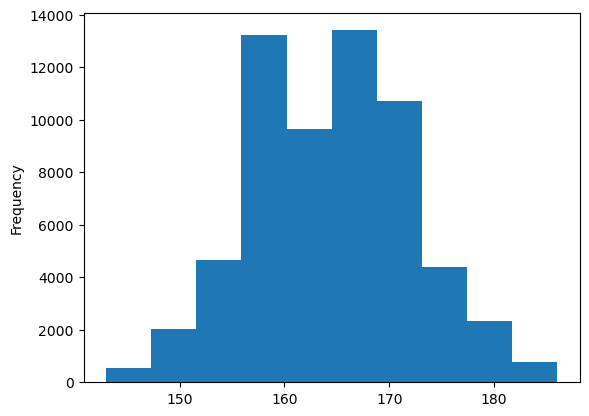

In [397]:
df['height'].plot(kind='hist')
# patients in this dataset were avg 150-175 in height

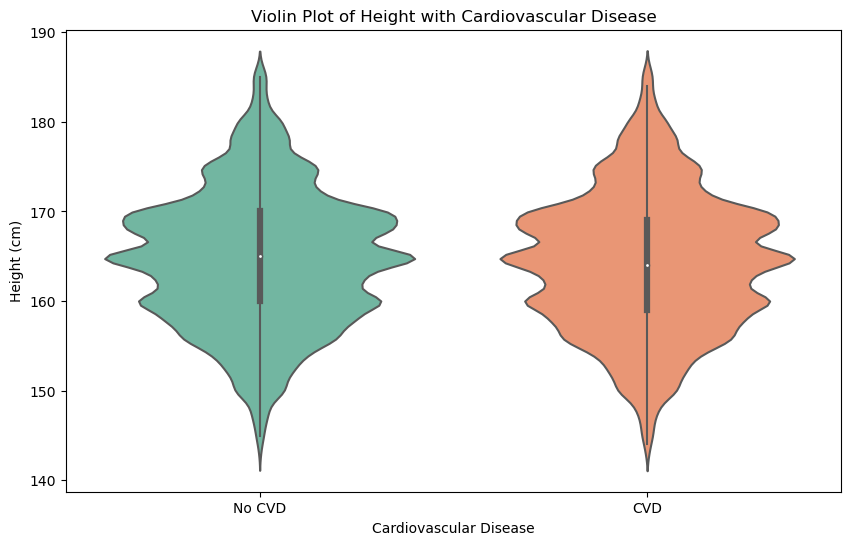

In [398]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cardio', y='height', data=df, palette='Set2')
plt.xticks(ticks=[0, 1], labels=['No CVD', 'CVD'])
plt.title('Violin Plot of Height with Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Height (cm)')
plt.show()
#height has no significant influence on target variable

<AxesSubplot: ylabel='Frequency'>

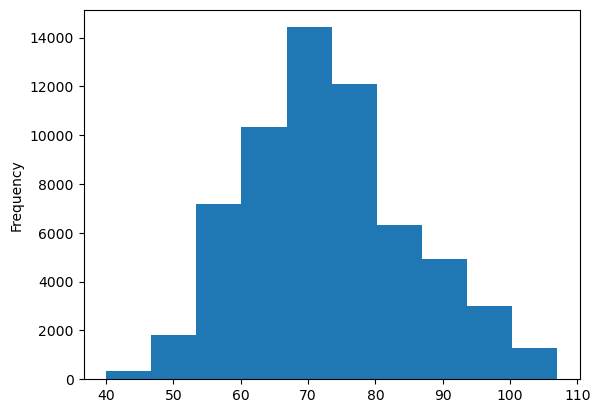

In [399]:
df['weight'].plot(kind='hist')
#patients in this dataset (were mainly 50-80 in weight)

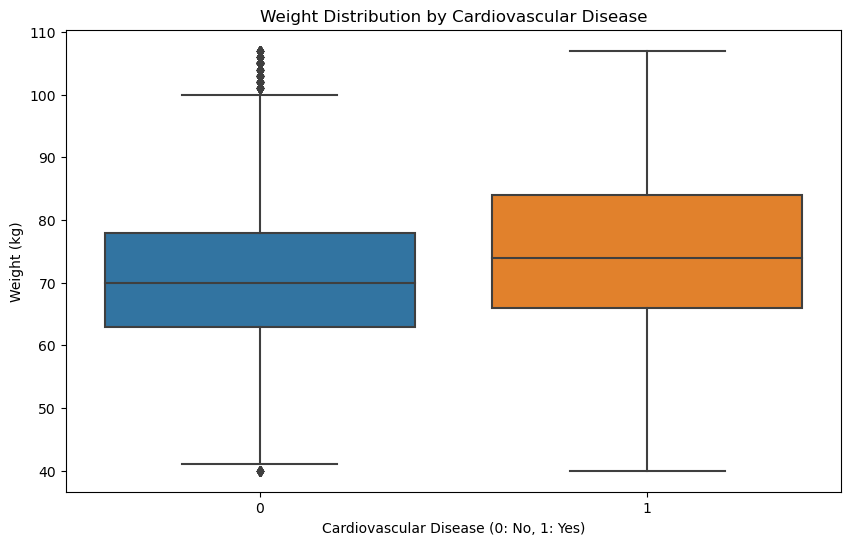

In [400]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='cardio', y='weight', data=df)
plt.title('Weight Distribution by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Weight (kg)')
plt.show()
#weight has no significant influence on target variable

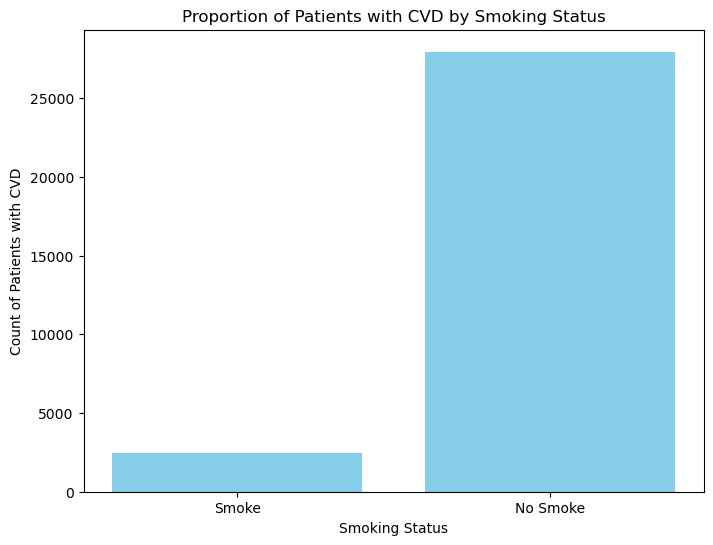

In [401]:
smoke_cvd_counts = df[df['smoke'] == 1]['cardio'].value_counts()
no_smoke_cvd_counts = df[df['smoke'] == 0]['cardio'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.bar(['Smoke', 'No Smoke'], [smoke_cvd_counts[1], no_smoke_cvd_counts[1]], color='skyblue')
plt.title('Proportion of Patients with CVD by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count of Patients with CVD')
plt.show()
#the majority of the test subjects with cardio were none smokers

In [402]:
df['smoke'].value_counts()
# based on the dataset, the majority of patients are none smokers hence find the percentage of cvd test subjects in each class

0    56432
1     5339
Name: smoke, dtype: int64

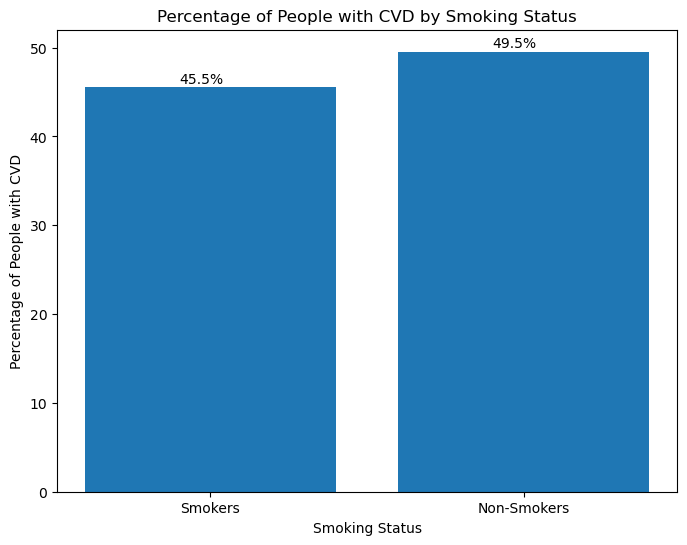

In [403]:
smokers_with_cvd = df[df['smoke'] == 1]['cardio'].mean() * 100
non_smokers_with_cvd = df[df['smoke'] == 0]['cardio'].mean() * 100
plt.figure(figsize=(8, 6))
plt.bar(['Smokers', 'Non-Smokers'], [smokers_with_cvd, non_smokers_with_cvd])
plt.title('Percentage of People with CVD by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage of People with CVD')
plt.text(-0.1, smokers_with_cvd + 0.5, f'{smokers_with_cvd:.1f}%', color='black')
plt.text(0.9, non_smokers_with_cvd + 0.5, f'{non_smokers_with_cvd:.1f}%', color='black')
plt.show()
#This indicates that smoking may not be the sole risk factor for CVD 

<AxesSubplot: ylabel='alco'>

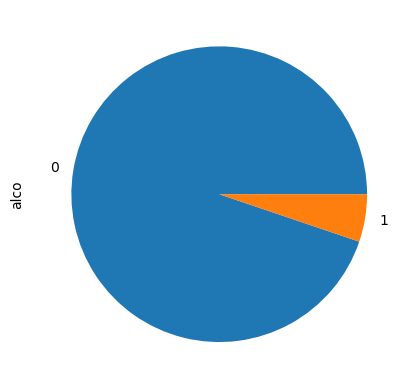

In [404]:
df["alco"].value_counts().plot(kind='pie')
# most of the patients in the dataset are seen to be non alcoholics  

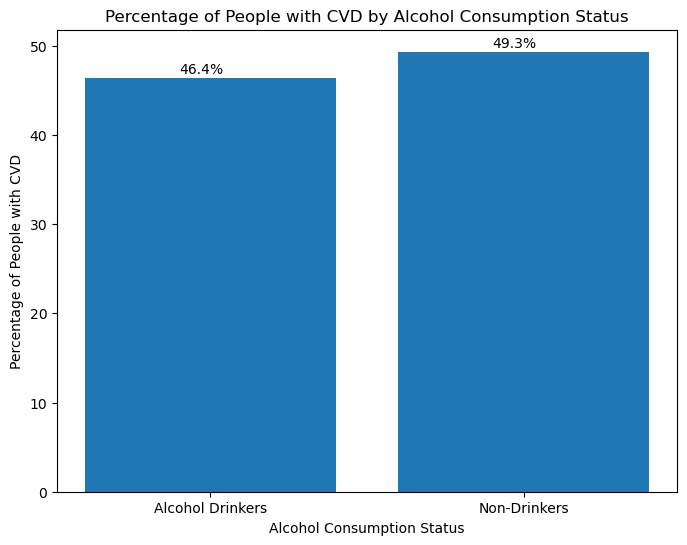

In [405]:
drinkers_with_cvd = df[df['alco'] == 1]['cardio'].mean() * 100
non_drinkers_with_cvd = df[df['alco'] == 0]['cardio'].mean() * 100
plt.figure(figsize=(8, 6))
plt.bar(['Alcohol Drinkers', 'Non-Drinkers'], [drinkers_with_cvd, non_drinkers_with_cvd])
plt.title('Percentage of People with CVD by Alcohol Consumption Status')
plt.xlabel('Alcohol Consumption Status')
plt.ylabel('Percentage of People with CVD')
plt.text(-0.1, drinkers_with_cvd + 0.5, f'{drinkers_with_cvd:.1f}%', color='black')
plt.text(0.9, non_drinkers_with_cvd + 0.5, f'{non_drinkers_with_cvd:.1f}%', color='black')
plt.show()
#Alcoholism has no significant influence on target variable in the dataset

<AxesSubplot: ylabel='active'>

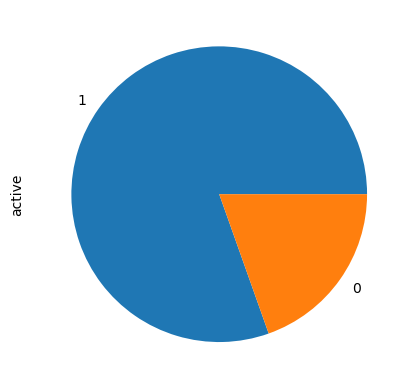

In [406]:
df["active"].value_counts().plot(kind='pie')
#most of the patients in the dataset are seen to be more physically active than inactive

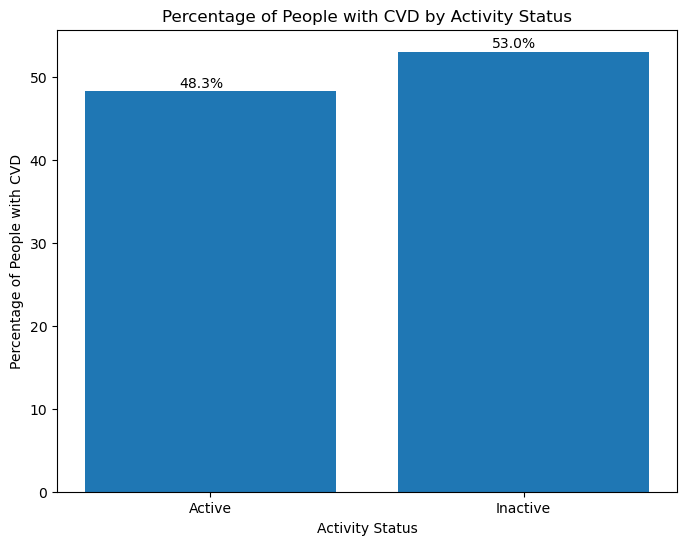

In [407]:
active_with_cvd = df[df['active'] == 1]['cardio'].mean() * 100
inactive_with_cvd = df[df['active'] == 0]['cardio'].mean() * 100
plt.figure(figsize=(8, 6))
plt.bar(['Active', 'Inactive'], [active_with_cvd, inactive_with_cvd])
plt.title('Percentage of People with CVD by Activity Status')
plt.xlabel('Activity Status')
plt.ylabel('Percentage of People with CVD')
plt.text(-0.1, active_with_cvd + 0.5, f'{active_with_cvd:.1f}%', color='black')
plt.text(0.9, inactive_with_cvd + 0.5, f'{inactive_with_cvd:.1f}%', color='black')
plt.show()
#activity has no significant influence on target variable in the dataset through there are more patients with cvd are that physically inactive 

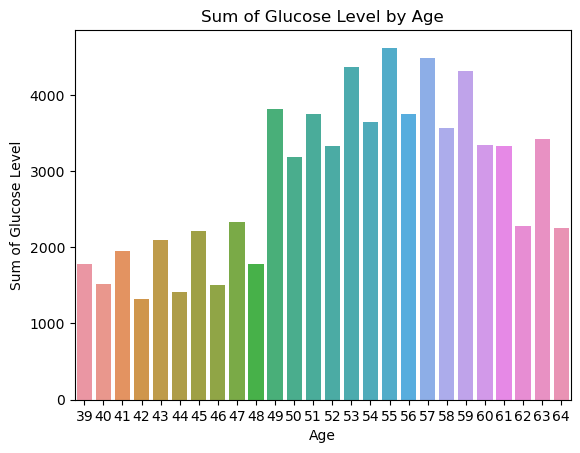

In [408]:
gluc_sum_by_gender = df.groupby('age')['gluc'].sum()
sns.barplot(x=gluc_sum_by_gender.index, y=gluc_sum_by_gender.values)
plt.title('Sum of Glucose Level by Age')
plt.xlabel('Age')
plt.ylabel('Sum of Glucose Level')
plt.show()
# ages 49-59 seems to have the highest glucose level

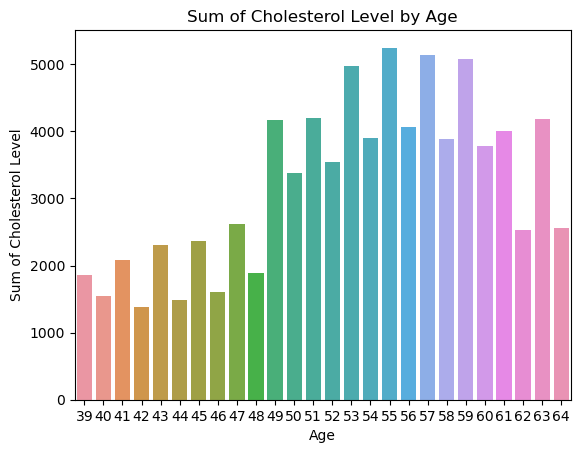

In [409]:
cholesterol_sum_by_age = df.groupby('age')['cholesterol'].sum()
sns.barplot(x=cholesterol_sum_by_age.index, y=cholesterol_sum_by_age.values)
plt.title('Sum of Cholesterol Level by Age')
plt.xlabel('Age')
plt.ylabel('Sum of Cholesterol Level')
plt.show()
# ages 49-59 seems to have the highest cholesterol level

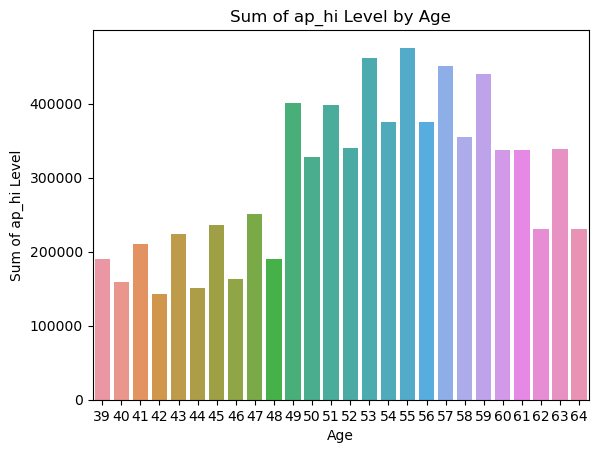

In [410]:
ap_hi_sum_by_age = df.groupby('age')['ap_hi'].sum()
sns.barplot(x=ap_hi_sum_by_age.index, y=ap_hi_sum_by_age.values)
plt.title('Sum of ap_hi Level by Age')
plt.xlabel('Age')
plt.ylabel('Sum of ap_hi Level')
plt.show()
# ages 49-59 seems to have the highest ap_hi

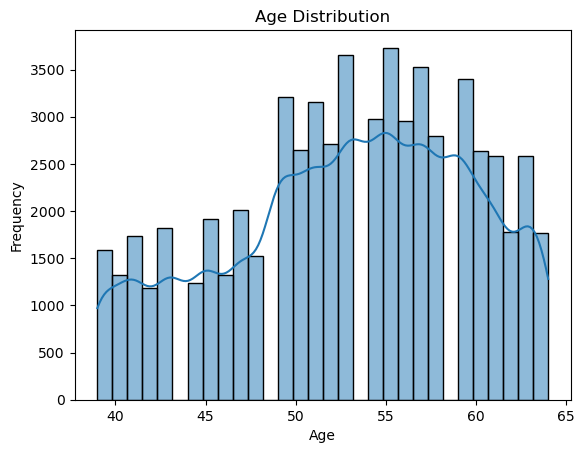

In [411]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#majority of test subject are within the 49-59 age group hence the major influence in the plot above

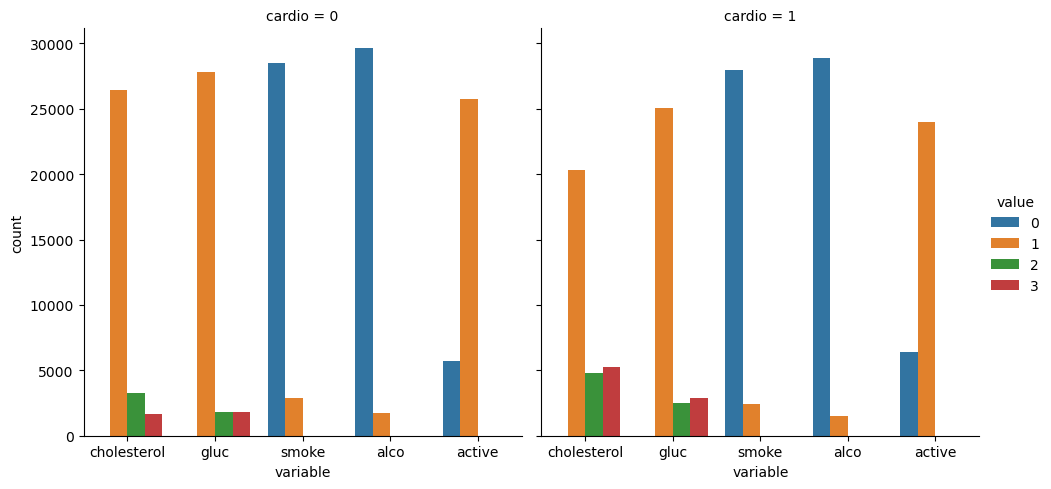

In [412]:
data1 = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value",col="cardio",data= data1,kind="count")
# this shows that patients who have high cholesterol and high glucose level are more prone to have CVD

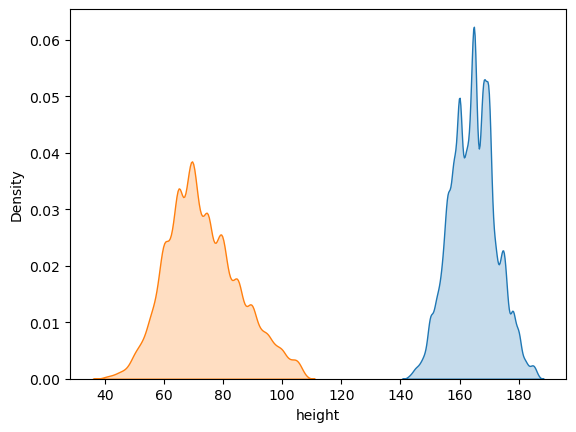

In [413]:
for col in ["height", "weight"]:
    sns.kdeplot(df[col], shade=True)

Calculating the BMI

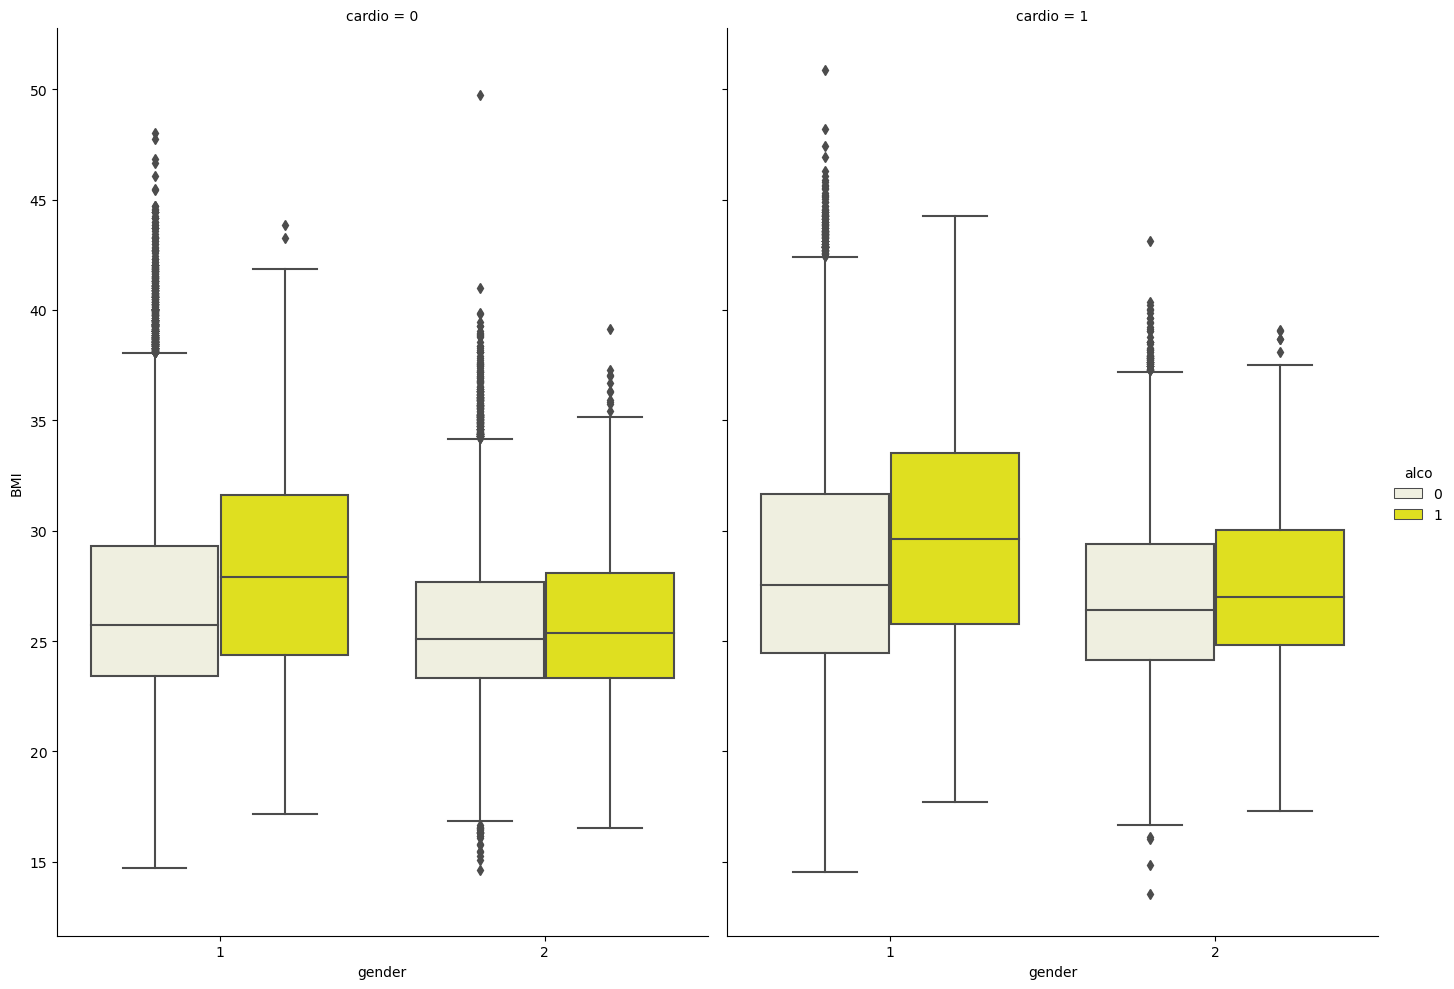

In [414]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7)

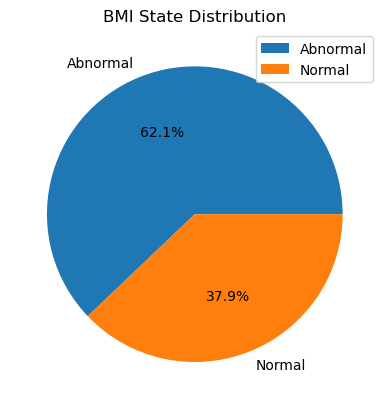

In [415]:
# determining normal & abnormal BMI
def bmi(bmi_num):
  if 18.5 <= bmi_num <= 25:
    return "Normal"
  else:
    return "Abnormal"

df["BMI_State"] = df["BMI"].apply(lambda x: bmi(x))
value_counts = df['BMI_State'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('BMI State Distribution')
plt.legend(value_counts.index)
plt.show()
#There was a higher rate of abnormal BMI than normal

In [416]:
df
df = df.drop('BMI', axis=1)
#drop bmi col since its converted to bmi state

In [417]:
bmi_state_mapping = {'Normal': 0, 'Abnormal': 1}
df['BMI_State'] = df['BMI_State'].map(bmi_state_mapping)
df['BMI_State'] = pd.Categorical(df['BMI_State'])
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI_State
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,8,59,1,151,67.0,120,80,2,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61766,99991,53,1,172,70.0,130,90,1,1,0,0,1,1,0
61767,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,1
61768,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,1
61769,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,1


<AxesSubplot: xlabel='BMI_State', ylabel='count'>

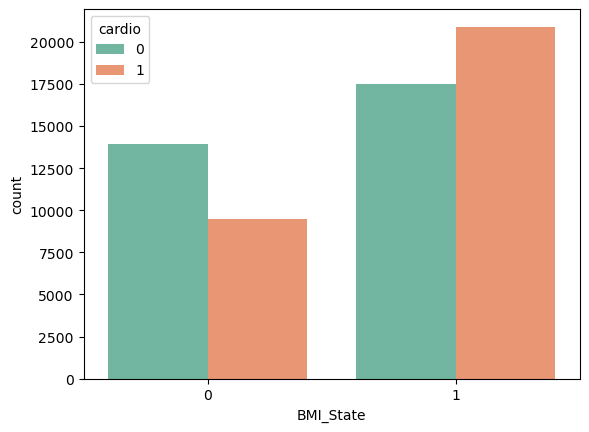

In [418]:
sns.countplot(x='BMI_State', hue='cardio', data = df, palette="Set2")
##patients with abnormal BMI are more prone to CVD

## Multivariate

Using correlation matrix to identify the features that are most strongly associated with the target variable.

In [419]:
#Calculate correlations
corr = df.corr()
#covariance matrix tell us how one feature varies to the other one 

/var/folders/lg/3khrfgwn2w920qd0wcmjxpph0000gn/T/ipykernel_74310/2884907696.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)
/var/folders/lg/3khrfgwn2w920qd0wcmjxpph0000gn/T/ipykernel_74310/2884907696.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  create = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot: >

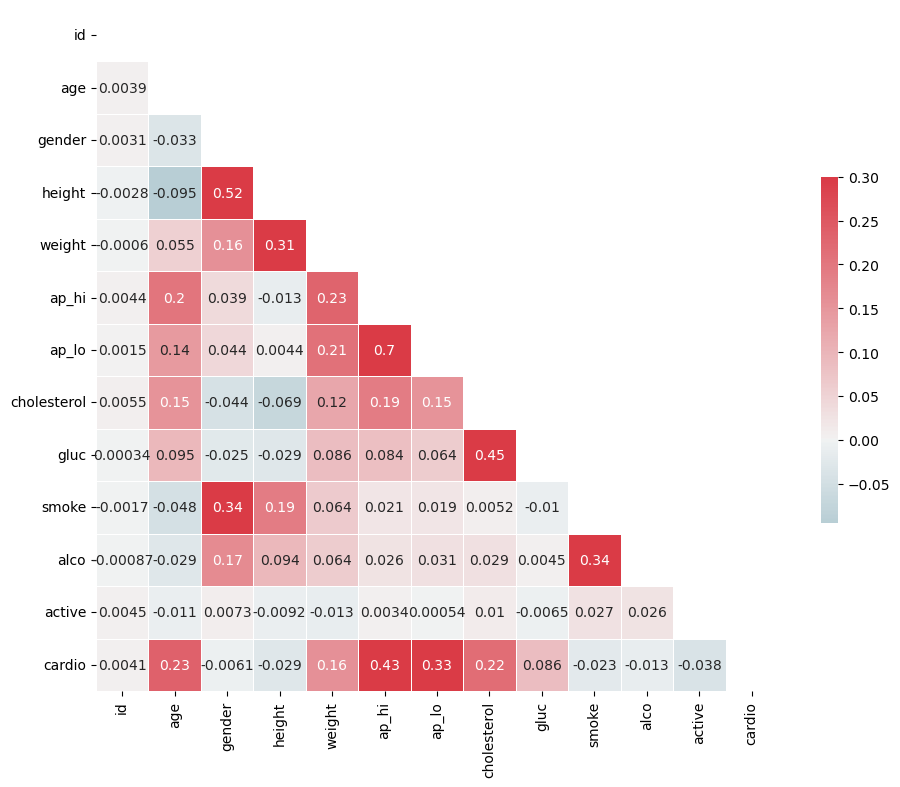

In [420]:
# create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
create = np.zeros_like(corr, dtype=np.bool)
create[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation matrix revealed that age, weight, cholesterol, systolic blood pressure, and diastolic blood pressure had a high positive correlation with the presence or absence of CVD. 


<AxesSubplot: >

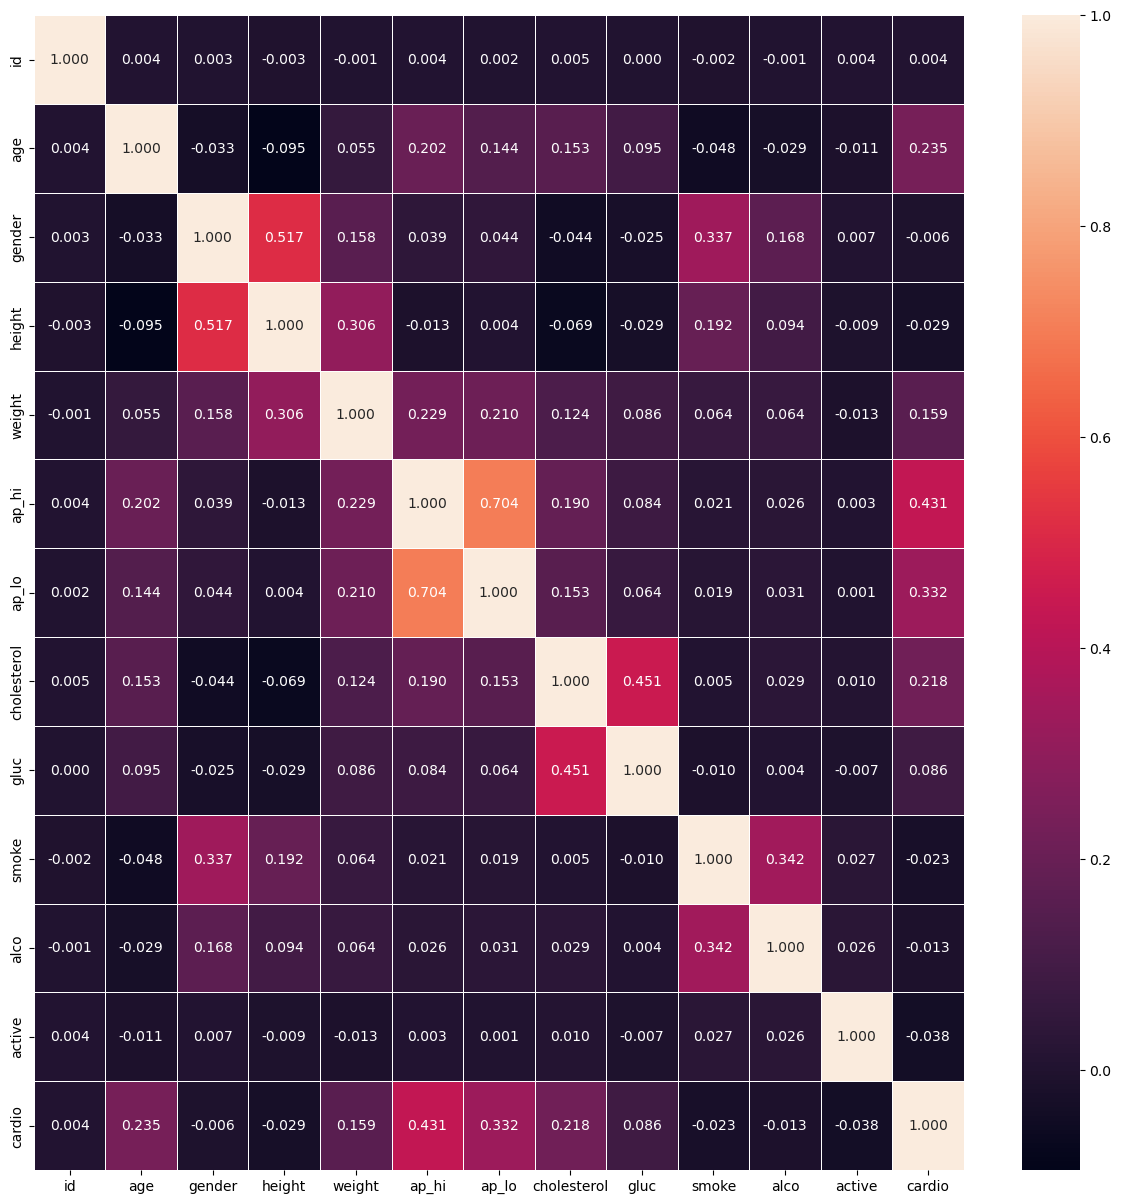

In [421]:
corr = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

From the heatmap, the weight, age, systolic blood pressure, and diastolic blood pressure and cholestrol seem to have the highest correlation with respect to our target variable(cardio). There is a correlation between weight, age and cholesterol?. Being overweight or obese tends to increase bad cholesterol and lower good cholesterol. Aging also causes cholesterol to increase. 

Cholesterol and glucose have a high correlation, whcih makes sense due to studies which show that elevated blood glucose levels (any type of diabetes) poses a risk of higher cholesterol, manifesting as diabetic dyslipidemia.

### K- Best Selector

## Feature

The features that are prominently shown to lead to CVD are non-smokers, those with high cholesterol, high glucose level and older patients. 

#### Binary Classification: Random Forest

Split the dataset into a 70-20-10 ratio for training, testing, and prediction sets, respectively.

In [422]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis=1), df['cardio'], test_size=0.3, random_state=42)


In [423]:
# Split the testing data further into testing and prediction sets
X_test, X_pred, y_test, y_pred = train_test_split(X_test, y_test, test_size=0.1, random_state=42)

Define hyperparameter to search over to increase test scores:

In [424]:
# Define the hyperparameters to search over:
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10]}


Train the model using the training data set; X_train and Y_train

In [425]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=1, random_state=42)

# Train the model on the training data
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1, random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [426]:
# Get the best decision tree from the grid search:
decision_tree = grid_search.best_estimator_.estimators_[0]

Evaluate the model's performance using the testing dataset, X_test and Y_test

In [427]:
# Evaluate the decision tree's performance on the testing set:
accuracy = decision_tree.score(X_test, y_test)
print(f"Accuracy on testing data: {accuracy}")

Accuracy on testing data: 0.7174721189591078


/Users/tamikaramkissoon/opt/anaconda3/envs/kris_env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [428]:
# Use the decision tree to make predictions on the prediction set:
y_pred = decision_tree.predict(X_pred)
print(y_pred)

[1. 0. 0. ... 1. 0. 0.]


/Users/tamikaramkissoon/opt/anaconda3/envs/kris_env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [429]:
# Evaluate the model's performance on the testing set
y_pred = grid_search.predict(X_test)
y_true = y_test
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)


Accuracy: 0.7174721189591078
Precision: 0.73776559287183
Recall: 0.6578657865786579
F1 score: 0.6955285603515121


Confusion matrix: Measure of true positives and true negatives from the prediction

In [430]:
# Get the confusion matrix for the prediction:
cm = confusion_matrix(y_pred, y_true)
# Calculate the true positives and true negatives from the confusion matrix:
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negative: {fn}")

True Negatives: 6584
True Positives: 5382
False Positives: 2799
False Negative: 1913


In [431]:
# Use the trained model to predict the likelihood of CVD for new individuals in the prediction set
y_predict_proba = grid_search.predict_proba(X_pred)[:, 1]
print(y_predict_proba *100)


[ 88.69565217  22.58945643  22.58945643 ... 100.          30.10752688
  33.37718474]


#### Binary Classification: CART

Split the data and restart the process using a CART Model 

In [432]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis=1), df['cardio'], test_size=0.3, random_state=42)

Create a decision tree model using CART algorithm

In [433]:
dtc = DecisionTreeClassifier(random_state=42)

Train the model using the training dataset

In [434]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluate the model using the testing dataset

In [435]:
y_pred = dtc.predict(X_test)

Use the model to predict the target for new individuals 

In [436]:
df_new = df.sample(frac=0.1, random_state=42)
X_new = df_new.drop('cardio', axis=1)
y_new_true = df_new['cardio']
y_new_pred = dtc.predict(X_new)

Evaluate the model using the training dataset

In [437]:
y_train_pred = dtc.predict(X_train)

print('Confusion matrix for training dataset:')
cm=confusion_matrix(y_new_pred, y_new_true)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negative: {fn}")

print('Accuracy score for training dataset:', accuracy_score(y_new_pred, y_new_true))
print('Precision score for training dataset:', precision_score(y_new_pred, y_new_true))
print('Recall score for training dataset:', recall_score(y_new_pred, y_new_true))
print('F1 score for training dataset:', f1_score(y_new_pred, y_new_true))


Confusion matrix for training dataset:
True Negatives: 2000
True Positives: 1862
False Positives: 1160
False Negative: 1155
Accuracy score for training dataset: 0.6252225999676219
Precision score for training dataset: 0.6161482461945731
Recall score for training dataset: 0.617169373549884
F1 score for training dataset: 0.6166583871501904


Tune the model to improve performance

In [438]:
parameters = {'max_depth': range(1, 11),
              'min_samples_leaf': range(1, 6)}

grid_search = GridSearchCV(estimator=dtc, param_grid=parameters, cv=5, n_jobs=-1)

In [439]:
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1}


In [440]:
dtc_tuned = grid_search.best_estimator_

Evaluate the tuned model using the testing dataset

In [441]:
y_tuned_pred = dtc_tuned.predict(X_test)

print('Confusion matrix for tuned model and testing dataset:')
cm=confusion_matrix(y_test, y_tuned_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negative: {fn}")

print('Accuracy score for tuned model and testing dataset:', accuracy_score(y_test, y_tuned_pred))
print('Precision score for tuned model and testing dataset:', precision_score(y_test, y_tuned_pred))
print('Recall score for tuned model and testing dataset:', recall_score(y_test, y_tuned_pred))
print('F1 score for tuned model and testing dataset:', f1_score(y_test, y_tuned_pred))

Confusion matrix for tuned model and testing dataset:
True Negatives: 7411
True Positives: 6018
False Positives: 2034
False Negative: 3069
Accuracy score for tuned model and testing dataset: 0.7246384631987913
Precision score for tuned model and testing dataset: 0.7473919523099851
Recall score for tuned model and testing dataset: 0.6622647738527567
F1 score for tuned model and testing dataset: 0.7022580080518116


In [442]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis=1), df['cardio'], test_size=0.3, random_state=42)

Create a logistic regression model

In [443]:
lr_model= linear.LogisticRegression(max_iter=10000)
print(lr_model.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


Train the model using the training dataset

In [444]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Get predicted class

In [445]:
pred_lr = lr_model.predict(X_test) 

The micro averaging method, which computes the F1 score globally by counting the total number of true positives, false negatives, and false positives across all classes. This method gives equal weight to each instance, regardless of its class label.

The macro averaging method, which computes the F1 score separately for each class and then takes the average over all classes. This method gives equal weight to each class, regardless of its frequency or imbalance in the dataset.

By comparing the F1 scores computed using different averaging methods, we can get a sense of how well the logistic regression model performs on the test dataset overall (micro-average) and on each individual class (macro-average). A higher F1 score indicates better performance, with a maximum score of 1.0 indicating perfect precision and recall.

In [446]:
print('F1-micro score of LR is ', metrics.f1_score(y_test, pred_lr, average='micro'))
print('F1-macro score of LR is ', metrics.f1_score(y_test, pred_lr, average='macro'))

F1-micro score of LR is  0.6974422620332398
F1-macro score of LR is  0.6957576354988408


By computing these evaluation metrics on the logistic regression model, we can assess the overall performance of the logistic regression model on the test dataset and identify areas where it may need improvement.

In [447]:
print('Confusion Matrix of LR is')

# Get the confusion matrix for the prediction:
cm=confusion_matrix(y_test, pred_lr)
#cm=metrics.confusion_matrix(y_test, pred_lr)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negative: {fn}")

print('Accuracy score for training dataset:', accuracy_score(y_test, pred_lr))
print('Precision score for training dataset:', precision_score(y_test, pred_lr))
print('Recall score for training dataset:', recall_score(y_test, pred_lr))
print('F1 score for training dataset:', f1_score(y_test, pred_lr))



Confusion Matrix of LR is
True Negatives: 7152
True Positives: 5773
False Positives: 2293
False Negative: 3314
Accuracy score for training dataset: 0.6974422620332398
Precision score for training dataset: 0.7157203074634267
Recall score for training dataset: 0.6353031803675581
F1 score for training dataset: 0.6731184049437416


Tune the model to improve performance

The default solver(lbfgs) in sklearn for Logistic regression does not support l1 penalty, so we only tested the default penalty (l2).

In [448]:
# Define the parameter grid to search over
lr_parameters = {'C': np.logspace(-3, 3, 7)}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_parameters, cv=5)


In [449]:
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)

Best parameters: {'C': 0.01}


In [450]:

lr_model_tuned = grid_search.best_estimator_

In [451]:
pred_tuned_lr = lr_model_tuned.predict(X_test)

print('Confusion matrix for tuned model and testing dataset:')
cm=confusion_matrix(y_test, pred_tuned_lr)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negative: {fn}")

print('Accuracy score for tuned model and testing dataset:', accuracy_score(y_test, pred_tuned_lr))
print('Precision score for tuned model and testing dataset:', precision_score(y_test, pred_tuned_lr))
print('Recall score for tuned model and testing dataset:', recall_score(y_test, pred_tuned_lr))
print('F1 score for tuned model and testing dataset:', f1_score(y_test, pred_tuned_lr))

Confusion matrix for tuned model and testing dataset:
True Negatives: 7152
True Positives: 5773
False Positives: 2293
False Negative: 3314
Accuracy score for tuned model and testing dataset: 0.6974422620332398
Precision score for tuned model and testing dataset: 0.7157203074634267
Recall score for tuned model and testing dataset: 0.6353031803675581
F1 score for tuned model and testing dataset: 0.6731184049437416


To choose the best threshold, we plot a receiver operating characteristic (ROC) curve and find the threshold that maximizes the area under the curve (AUC)

Optimal decision threshold: 0.5273313650734212


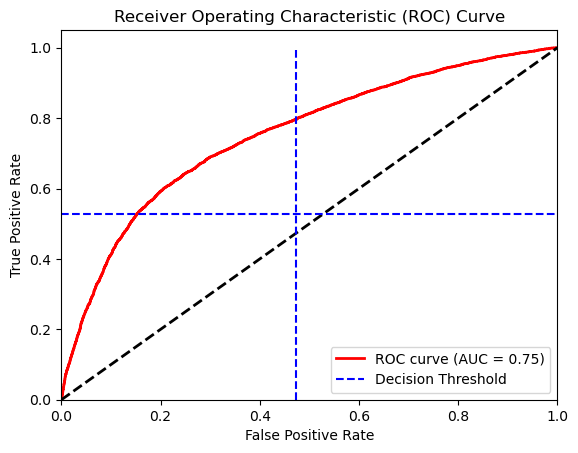

In [452]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = lr_model_tuned.predict_proba(X_test)[:, 1]
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal decision threshold:", optimal_threshold)


plt.plot([0, 1], [optimal_threshold, optimal_threshold], linestyle='--', color='blue', label='Decision Threshold')
plt.plot([1 - optimal_threshold, 1 - optimal_threshold], [0, 1], linestyle='--', color='blue')


plt.legend(loc="lower right")


plt.show()

Bayesian Model

# Build Naive Bayes Model with Default Hyperparameter

In [453]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Creating a model
baye_model = GaussianNB()

Training the model using training dataset

In [454]:
baye_model.fit(X_train, y_train)

GaussianNB()

Evaluating model using the testing dataset

In [455]:
bay_pred = baye_model.predict(X_test)

To determine the performance of the bayesian model on the test dataset & find areas of improvement

In [456]:
print('Confusion Matrix of Bayesian Model is: ')

# cm  = confusion matrix for the prediction:
cm=confusion_matrix(y_test, bay_pred)

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negative: {fn}")

print('Accuracy score for training dataset:', accuracy_score(y_test, bay_pred))
print('Precision score for training dataset:', precision_score(y_test, bay_pred))
print('Recall score for training dataset:', recall_score(y_test, bay_pred))
print('F1 score for training dataset:', f1_score(y_test, bay_pred))


Confusion Matrix of Bayesian Model is: 
True Negatives: 7887
True Positives: 5315
False Positives: 1558
False Negative: 3772
Accuracy score for training dataset: 0.7123893805309734
Precision score for training dataset: 0.7733158737087152
Recall score for training dataset: 0.5849015076482887
F1 score for training dataset: 0.6660401002506265


Tuning model to create improvements

In [457]:
parameters = {'max_depth': range(1, 11),
              'min_samples_leaf': range(1, 6)}

baye_gridsearch = GridSearchCV(estimator=dtc, param_grid=parameters, cv=5, n_jobs=-1)

In [458]:
# Training model with the training data
param_grid_gnb = {'var_smoothing': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001]}

In [459]:
gaussianNB_cv = GridSearchCV(baye_model, param_grid_gnb, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gaussianNB_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001]},
             scoring='f1', verbose=1)

In [460]:
#params_optimal_gnb = gaussianNB_cv.best_params_

In [461]:
baye_tuned = gaussianNB_cv.best_estimator_

In [462]:
baye_tuned_model = baye_tuned.predict(X_test)

print('Confusion matrix for tuned Bayesian model:')
cm=confusion_matrix(y_test,baye_tuned_model)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negative: {fn}")

print('Accuracy score for tuned model and testing dataset:', accuracy_score(y_test, baye_tuned_model))
print('Precision score for tuned model and testing dataset:', precision_score(y_test, baye_tuned_model))
print('Recall score for tuned model and testing dataset:', recall_score(y_test, baye_tuned_model))
print('F1 score for tuned model and testing dataset:', f1_score(y_test, baye_tuned_model))

Confusion matrix for tuned Bayesian model:
True Negatives: 7887
True Positives: 5315
False Positives: 1558
False Negative: 3772
Accuracy score for tuned model and testing dataset: 0.7123893805309734
Precision score for tuned model and testing dataset: 0.7733158737087152
Recall score for tuned model and testing dataset: 0.5849015076482887
F1 score for tuned model and testing dataset: 0.6660401002506265
